Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Training Started...
Epoch 0: Train acc: 0.8724954462659381 |Validation acc: 0.910377358490566
Epoch 1: Train acc: 0.8724954462659381 |Validation acc: 0.910377358490566
Epoch 2: Train acc: 0.8724954462659381 |Validation acc: 0.910377358490566
Epoch 3: Train acc: 0.8724954462659381 |Validation acc: 0.910377358490566
Epoch 4: Train acc: 0.8724954462659381 |Validation acc: 0.910377358490566
Epoch 5: Train acc: 0.8724954462659381 |Validation acc: 0.910377358490566
Epoch 6: Train acc: 0.8724954462659381 |Validation acc: 0.910377358490566
Epoch 7: Train acc: 0.12750455373406194 |Validation acc: 0.08962264150943396
Epoch 8: Train acc: 0.8724954462659381 |Validation acc: 0.910377358490566
Epoch 9: Train acc: 0.8724954462659381 |Validation acc: 0.910377358490566
Epoch 10: Train acc: 0.8724954462659381 |Validation acc: 0.910377358490566
Epoch 11: Train acc: 0.8724954462

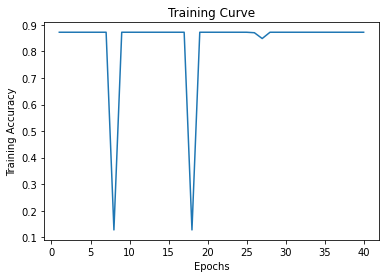

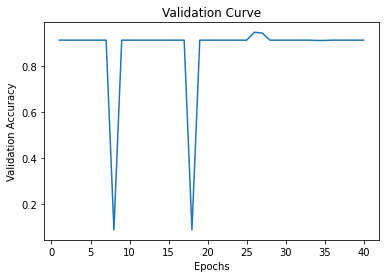

In [4]:

'''
! pip install -q kaggle
from google.colab import files
files.upload()
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets list
!kaggle datasets download -d paultimothymooney/breast-histopathology-images
! unzip breast-histopathology-images.zip -d breast-histopathology-images
import os

count = 0

file0 = '/content/breast-histopathology-imagesNEW/0'
file1 = '/content/breast-histopathology-imagesNEW/1'
master = '/content/breast-histopathology-imagesNEW'

# os.mkdir(master)
# os.mkdir(file0)
# os.mkdir(file1)



for dirname, _, filenames in os.walk('/content/breast-histopathology-images'):
    for filename in filenames:
        str1 = filename[0:5]
        str2 = '.'
        str3 = filename[-5]
        str4 = '.'
        str5 = str(count)
        str6 = '.png'
        newname =  str1 + str2 + str3 + str4 + str5 + str6
        
        # old path of the file
        oldpath = os.path.join(dirname, filename)
        
        # new path for files to go into directory 0 and directory 1
        newpath0 = os.path.join(file0, newname)
        newpath1 = os.path.join(file1, newname)


        

        # sending all 0 files to 0 folder
        if int(str3) == 0:
          os.rename(oldpath, newpath0)
          print(newpath0)


        # sending all 1 files to 1 folder
        if int(str3) == 1:
          os.rename(oldpath, newpath1)
          print(newpath1)
        count += 1

  
        # os.rename(oldpath, newpath)

# creating appropriate directories 

trainDir = '/content/breast-histopathology-imagesNEW/train'
valDir = '/content/breast-histopathology-imagesNEW/validation'
testDir = '/content/breast-histopathology-imagesNEW/test'

os.mkdir(trainDir)
os.mkdir(valDir)
os.mkdir(testDir)

# training directories of 0 and 1
train0 = '/content/breast-histopathology-imagesNEW/train/0'
train1 = '/content/breast-histopathology-imagesNEW/train/1'
os.mkdir(train0)
os.mkdir(train1)

# validation directories of 0 and 1
validation0 = '/content/breast-histopathology-imagesNEW/validation/0'
validation1 = '/content/breast-histopathology-imagesNEW/validation/1'
os.mkdir(validation0)
os.mkdir(validation1)

# testing directories of 0 and 1
test0 = '/content/breast-histopathology-imagesNEW/test/0'
test1 = '/content/breast-histopathology-imagesNEW/test/1'
os.mkdir(test0)
os.mkdir(test1)

# counting how many files are present in each directory

path, dirs, files = next(os.walk("/content/breast-histopathology-imagesNEW/0"))
file_count = len(files)
print("number of zero files are {}".format(file_count))

path, dirs, files = next(os.walk("/content/breast-histopathology-imagesNEW/1"))
file2 = len(files)
print("number of one files are {}".format(file2))

# dividing data into a 0.7 0.15 0.15 split by getting the appropriate index

# number of zero files
fileNumber0 =  file_count #397477

# number of one files
fileNumber1 = file2 #157560

trainIdx = [round(fileNumber0 * 0.7), round(fileNumber1 *0.7)]
valIdx = [round(fileNumber0 * 0.85), round(fileNumber1 *0.85)]
testIdx = [round(fileNumber0), round(fileNumber1)]

print(trainIdx)
print(valIdx)
print(testIdx)

directoryTrain1 = '/content/breast-histopathology-imagesNEW/train/1'
directoryTrain0 = '/content/breast-histopathology-imagesNEW/train/0'
directoryValidation1 = '/content/breast-histopathology-imagesNEW/validation/1'
directoryValidation0 = '/content/breast-histopathology-imagesNEW/validation/0'
directorytest1 = '/content/breast-histopathology-imagesNEW/test/1'
directorytest0 = '/content/breast-histopathology-imagesNEW/test/0'


count = 0
# walking through the 0 directory first
for dirname, _, filenames in os.walk('/content/breast-histopathology-imagesNEW/0'):
    for filename in filenames:
        oldpath = os.path.join(dirname, filename)

        # upto train index eveyrthing into train0 directory
        if count <=trainIdx[0]:
            newpath = os.path.join(directoryTrain0, filename)
            os.rename(oldpath, newpath)
            print(newpath)

        # upto val index into val directory
        elif count > trainIdx[0] and count <= valIdx[0]:
            newpath = os.path.join(directoryValidation0, filename)
            os.rename(oldpath, newpath)
            print(newpath)


        # upto test index into test directory 
        elif count >valIdx[0] and count <testIdx[0]:
            newpath = os.path.join(directorytest0, filename)
            os.rename(oldpath, newpath)
            print(newpath)

        count += 1

        if count > testIdx[0]:
            break

    if count > testIdx[0]:
            break

directoryTrain1 = '/content/breast-histopathology-imagesNEW/train/1'
directoryTrain0 = '/content/breast-histopathology-imagesNEW/train/0'
directoryValidation1 = '/content/breast-histopathology-imagesNEW/validation/1'
directoryValidation0 = '/content/breast-histopathology-imagesNEW/validation/0'
directorytest1 = '/content/breast-histopathology-imagesNEW/test/1'
directorytest0 = '/content/breast-histopathology-imagesNEW/test/0'


count = 0
# walking through the 0 directory first
for dirname, _, filenames in os.walk('/content/breast-histopathology-imagesNEW/1'):
    for filename in filenames:
        oldpath = os.path.join(dirname, filename)

        # upto train index eveyrthing into train1 directory
        if count <=trainIdx[1]:
            newpath = os.path.join(directoryTrain1, filename)
            os.rename(oldpath, newpath)
            print(newpath)

        # upto val index into val1 directory
        elif count > trainIdx[1] and count <= valIdx[1]:
            newpath = os.path.join(directoryValidation1, filename)
            os.rename(oldpath, newpath)
            print(newpath)


        # upto test index into test1 directory 
        elif count >valIdx[1] and count <testIdx[1]:
            newpath = os.path.join(directorytest1, filename)
            os.rename(oldpath, newpath)
            print(newpath)

        count += 1

        if count > testIdx[1]:
            break

    if count > testIdx[1]:
            break


'''






from google.colab import drive
drive.mount('/content/drive')

import torch
import numpy as np
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import torchvision
import matplotlib.pyplot as plt
from torchvision import datasets, models, transforms
from torch.utils.data import TensorDataset


import torchvision
import torchvision.transforms as transforms
from torch.utils.data.sampler import SubsetRandomSampler
import matplotlib.pyplot as plt



train_path = '/content/drive/My Drive/Kaggle/breast-histopathology-images/10253'
val_path = '/content/drive/My Drive/Kaggle/breast-histopathology-images/10254'
test_path = '/content/drive/My Drive/Kaggle/breast-histopathology-images/10255'


def get_data_loader(batch_size, file_path):
    transform = torchvision.transforms.ToTensor()
    train_dataset = torchvision.datasets.ImageFolder(file_path + \
                                                '10253', transform=transform)
    val_dataset = torchvision.datasets.ImageFolder(file_path + \
                                                '10254', transform=transform)
    test_dataset = torchvision.datasets.ImageFolder(file_path + \
                                                  '10255', transform=transform)
    train_loader = torch.utils.data.DataLoader(train_dataset, \
                                      batch_size=batch_size, shuffle = True)
    val_loader = torch.utils.data.DataLoader(val_dataset, \
                                      batch_size = batch_size, shuffle=True)
    test_loader = torch.utils.data.DataLoader(test_dataset, \
                                      batch_size = batch_size, shuffle=True)
    
    return train_loader, val_loader, test_loader


filepath = "/content/drive/My Drive/Kaggle/breast-histopathology-images/"
batch_size = 512
train_loader, val_loader, test_loader = get_data_loader(batch_size, filepath)


#torch.manual_seed(10) # set the random seed
from math import floor
from torch.autograd import Variable

class ANN(nn.Module):
    def __init__(self):
          self.name = "ANN"
          super(ANN, self).__init__()
          self.fc1 = nn.Linear(3*50*50, 50)
          self.fc2 = nn.Linear(50, 2)

    def forward(self, x):
          x1 = x.view(-1, 3*50*50)
          x1 = F.relu(self.fc1(x1))
          x1 = self.fc2(x1)
          return x1

def train(model,  batch_size=512, num_epochs=40, learn_rate=0.01):

    torch.manual_seed(10)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=learn_rate)
    train_acc = np.zeros(num_epochs)
    val_acc = np.zeros(num_epochs)
    print ("Training Started...")
    n = 0
    for epoch in range(num_epochs):
        total_train_loss = 0.0
        total_train_err = 0.0
        total_images = 0
        for imgs, labels in iter(train_loader):
            #print(labels)
            out = model(imgs)            
            loss = criterion(out, labels) 
            loss.backward()               
            optimizer.step()              
            optimizer.zero_grad()         
            n += 1  
            total_images += 1 
                 
        #print(total_images)
        total_images = 0
        train_acc[epoch] = get_accuracy(model, train_loader)
        val_acc[epoch] = get_accuracy(model, val_loader)
        print(("Epoch {}: Train acc: {} |" + "Validation acc: {}").format(epoch, train_acc[epoch], val_acc[epoch]))
    epochs = np.arange(1, num_epochs + 1)
    return train_acc, val_acc, epochs


def get_accuracy(model, data_loader):
    correct = 0
    total = 0
    for imgs, labels in data_loader:
        output = model(imgs)
        result = torch.argmax(output, 1)
        correct += torch.eq(result, labels).sum().item()
        total += len(labels)
    return correct / total


NN = ANN()

train_acc, val_acc, epochs = train(NN)

plt.plot(epochs, train_acc)
plt.title("Training Curve")
plt.xlabel("Epochs")
plt.ylabel("Training Accuracy")
plt.show()

plt.plot(epochs, val_acc)
plt.title("Validation Curve")
plt.xlabel("Epochs")
plt.ylabel("Validation Accuracy")
plt.show()




